In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('winequality-white.csv',sep=',')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
X=df.drop('quality',axis=1)
y=df['quality']
xtrain, xtest, ytrain, ytest=train_test_split(X,y, train_size=0.80)

In [7]:
print(ytrain.value_counts())

quality
6    1758
5    1147
7     709
8     151
4     131
3      17
9       5
Name: count, dtype: int64


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
xtrainS, xtestS, ytrain, ytest=train_test_split(X_scaled,y, train_size=0.80)
X_scaled

array([[0.30769231, 0.18627451, 0.21686747, ..., 0.25454545, 0.26744186,
        0.12903226],
       [0.24038462, 0.21568627, 0.20481928, ..., 0.52727273, 0.31395349,
        0.24193548],
       [0.41346154, 0.19607843, 0.24096386, ..., 0.49090909, 0.25581395,
        0.33870968],
       ...,
       [0.25961538, 0.15686275, 0.11445783, ..., 0.24545455, 0.27906977,
        0.22580645],
       [0.16346154, 0.20588235, 0.18072289, ..., 0.56363636, 0.18604651,
        0.77419355],
       [0.21153846, 0.12745098, 0.22891566, ..., 0.49090909, 0.11627907,
        0.61290323]])

In [9]:
#KNN
model_knn=KNeighborsClassifier(n_neighbors=7)
model_knn.fit(xtrainS,ytrain)
print("Accuracy of KNN on train: ",model_knn.score(xtrainS,ytrain))
print("Accuracy of KNN on test: ",model_knn.score(xtestS,ytest))
print()
#Decision Tree
model_dt=DecisionTreeClassifier()
model_dt.fit(xtrainS,ytrain)
print("Accuracy of KNN on train: ",model_dt.score(xtrainS,ytrain))
print("Accuracy of KNN on test: ",model_dt.score(xtestS,ytest))
print()
#Random Forest
model_rf=RandomForestClassifier()
model_rf.fit(xtrainS,ytrain)
print("Accuracy of KNN on train: ",model_rf.score(xtrainS,ytrain))
print("Accuracy of KNN on test: ",model_rf.score(xtestS,ytest))

Accuracy of KNN on train:  0.6623277182235835
Accuracy of KNN on test:  0.5448979591836735

Accuracy of KNN on train:  1.0
Accuracy of KNN on test:  0.5969387755102041

Accuracy of KNN on train:  1.0
Accuracy of KNN on test:  0.6846938775510204


Classification report

In [10]:
from sklearn.metrics import classification_report
print("For KNN on test:")
print(classification_report(ytest,model_knn.predict(xtestS),zero_division=0))
print("======================================================")
print("For Decision Tree on test:")
print(classification_report(ytest,model_dt.predict(xtestS),zero_division=0))
print("======================================================")
print("For Random Forest on test:")
print(classification_report(ytest,model_rf.predict(xtestS),zero_division=0))
print("======================================================")

For KNN on test:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.33      0.06      0.11        32
           5       0.55      0.63      0.59       288
           6       0.57      0.62      0.59       448
           7       0.49      0.39      0.43       183
           8       0.17      0.08      0.11        25

    accuracy                           0.54       980
   macro avg       0.35      0.30      0.30       980
weighted avg       0.53      0.54      0.53       980

For Decision Tree on test:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.29      0.34      0.31        32
           5       0.61      0.63      0.62       288
           6       0.66      0.63      0.64       448
           7       0.56      0.54      0.55       183
           8       0.32      0.44      0.37        25
           9       0.00      0.00 

Linear Regression

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
y=df.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates','alcohol'],axis='columns')
x=df.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates','quality'],axis='columns')
xtrainN,xtestN,ytrainN,ytestN=train_test_split(x,y,train_size=0.8)
model_lr.fit(xtrainN,ytrainN)

LinearRegression()

In [13]:
print("Mean Square Error of Linear Regression on test: ",((ytestN-model_lr.predict(xtestN))**2).mean())
print("Mean Square Error of Linear Regression on train: ",((ytrainN-model_lr.predict(xtrainN))**2).mean())
from sklearn.metrics import r2_score
print("R2 score of Linear Regression on test: ",r2_score(ytestN,model_lr.predict(xtestN)))
print("R2 score of Linear Regression on train: ",r2_score(ytrainN,model_lr.predict(xtrainN)))

Mean Square Error of Linear Regression on test:  quality    0.584887
dtype: float64
Mean Square Error of Linear Regression on train:  quality    0.648057
dtype: float64
R2 score of Linear Regression on test:  0.19066272837755616
R2 score of Linear Regression on train:  0.18945719658808868


Plotting the regression curve line

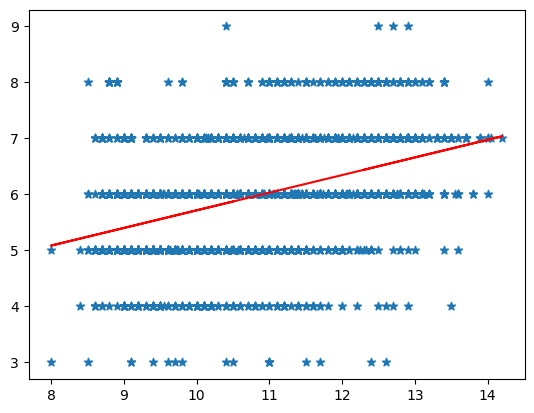

In [14]:
plt.scatter(xtrainN,ytrainN,marker='*')
plt.plot(xtrainN,model_lr.predict(xtrainN),c='r')
plt.show()

In [15]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [16]:
print("Most Correlated Features to Target :- [quality] are \n1. alchol\n2. density\n3. chlorides")

Most Correlated Features to Target :- [quality] are 
1. alchol
2. density
3. chlorides


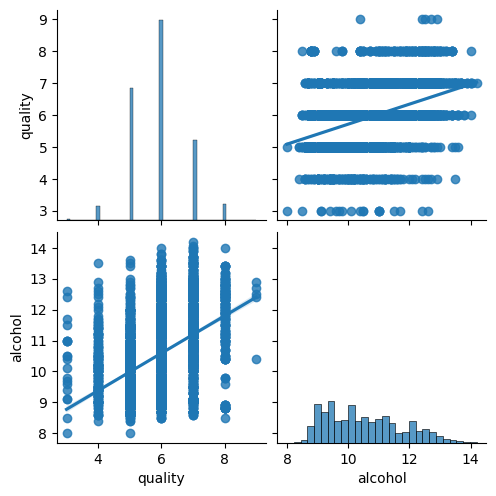

In [17]:
sns.pairplot(df[['quality','alcohol']],kind='reg')

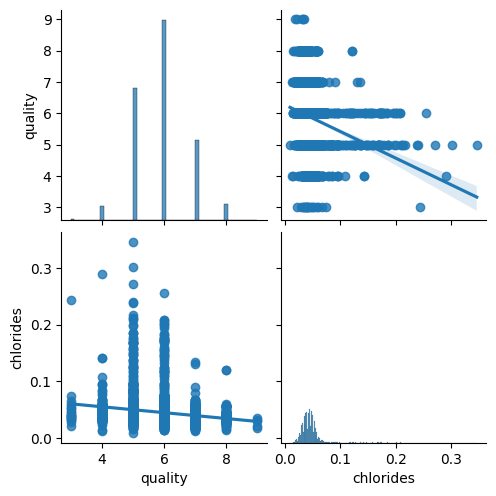

In [18]:
sns.pairplot(df[['quality','chlorides']],kind='reg')

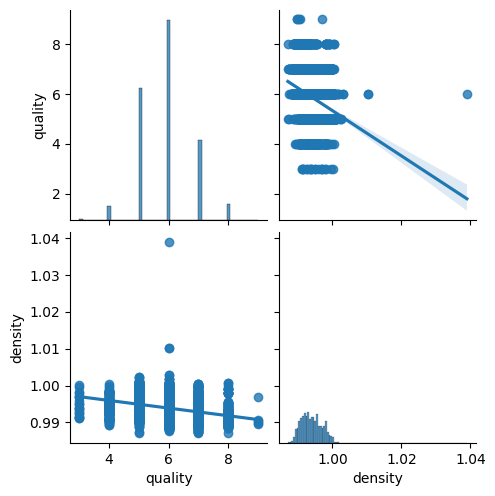

In [19]:
sns.pairplot(df[['quality','density']],kind='reg')

KMeans for Unsupervised Learning

In [20]:
#sns.pairplot(df,hue='quality')

In [21]:
from sklearn.cluster import KMeans
df1=df
losses=[]
for i in range(1,11):
    model_km=KMeans(n_clusters=i)
    model_km.fit(df1)
    losses.append(model_km.inertia_)
print(losses)

[10401844.996364485, 4169863.9213636587, 2748671.0591092138, 2085114.041750621, 1753106.9272266803, 1548969.4678990366, 1383642.0945807497, 1269549.4907970233, 1152096.494307242, 1048432.1264500906]


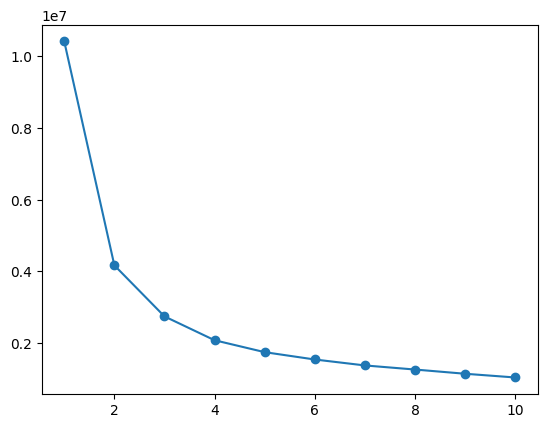

In [22]:
plt.plot(range(1,11),losses,marker='o')
plt.show()

In [23]:
print("4 is appearing to be right !")
model_km=KMeans(n_clusters=4)
model_km.fit(df1)
df1['clusters']=model_km.predict(df1)

4 is appearing to be right !


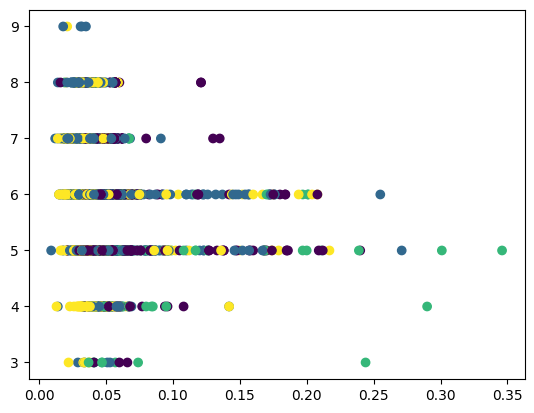

In [24]:
plt.scatter(df1['chlorides'],df1['quality'],c=df1['clusters'])
plt.show()

4


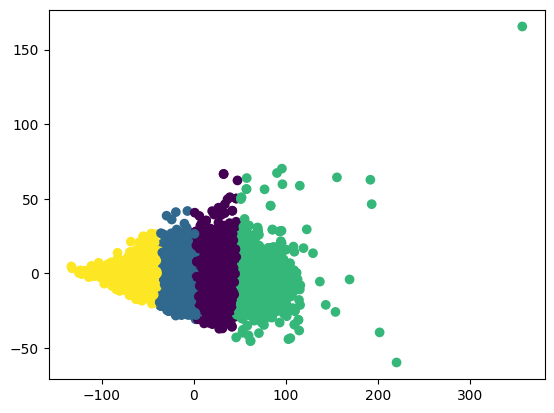

In [25]:
import numpy as np
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)
# we need to convert the y(target) to numpy array for use it as color in scatter plot
clusters=df1['clusters']
cluster_arr=clusters.values
print(clusters.nunique())
plt.scatter(X_pca[:,0],X_pca[:,1],c=cluster_arr)
plt.show()

** Association Rule Mining

In [26]:
#one hot encoding
df_encoded=pd.get_dummies(df1,columns=['quality','clusters'])
df_encoded=df_encoded[['quality_3', 'quality_4', 'quality_5',
       'quality_6', 'quality_7', 'quality_8', 'quality_9', 'clusters_0',
       'clusters_1', 'clusters_2', 'clusters_3']]

In [27]:
df1=df.drop(['quality','clusters'],axis=1)
df1.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
dtype: float64

In [28]:
def prepare(row_value):
    column_mean=df1.mean()
    return row_value>=column_mean
df1=df1.apply(prepare,axis=1)
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,True,False,True,True,False,True,True,True,False,False,False
1,False,True,True,False,True,False,False,False,True,True,False
2,True,True,True,True,True,False,False,True,True,False,False
3,True,False,False,True,True,True,True,True,True,False,False
4,True,False,False,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,True,True,True
4894,False,True,True,True,True,True,True,True,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False
4896,False,True,False,False,False,False,False,False,True,False,True


In [29]:
df_encoded=pd.concat([df1,df_encoded],axis=1)

In [30]:
df_encoded.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_3', 'quality_4', 'quality_5',
       'quality_6', 'quality_7', 'quality_8', 'quality_9', 'clusters_0',
       'clusters_1', 'clusters_2', 'clusters_3'],
      dtype='object')

In [31]:
df_encoded1=df_encoded.drop(['quality_3', 'quality_4', 'quality_5',
       'quality_6', 'quality_7', 'quality_8', 'quality_9', 'clusters_0',
       'clusters_1', 'clusters_2', 'clusters_3'],axis=1)

In [32]:
#apriori algorithm application
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df_encoded1,use_colnames=True,min_support=0.2)
frequent_itemsets

,support,itemsets
0,0.462025,(fixed acidity)
1,0.442221,(volatile acidity)
2,0.414047,(citric acid)
3,0.441200,(residual sugar)
4,0.406697,(chlorides)
5,0.452430,(free sulfur dioxide)
6,0.465496,(total sulfur dioxide)
7,0.464884,(density)
8,0.477338,(pH)
9,0.462434,(sulphates)


In [33]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(fixed acidity),(citric acid),0.462025,0.414047,0.237852,0.514803,1.243347,0.046552,1.207662,0.363807
1,(citric acid),(fixed acidity),0.414047,0.462025,0.237852,0.574458,1.243347,0.046552,1.264209,0.334018
2,(residual sugar),(fixed acidity),0.441200,0.462025,0.224786,0.509486,1.102724,0.020940,1.096758,0.166705
3,(fixed acidity),(total sulfur dioxide),0.462025,0.465496,0.235402,0.509501,1.094533,0.020331,1.089714,0.160543
4,(total sulfur dioxide),(fixed acidity),0.465496,0.462025,0.235402,0.505702,1.094533,0.020331,1.088360,0.161585
...,...,...,...,...,...,...,...,...,...,...
68,"(free sulfur dioxide, total sulfur dioxide)","(density, residual sugar)",0.322785,0.377093,0.212332,0.657812,1.744429,0.090612,1.820363,0.630149
69,"(residual sugar, total sulfur dioxide)","(free sulfur dioxide, density)",0.297673,0.275214,0.212332,0.713306,2.591819,0.130408,2.528080,0.874479
70,"(free sulfur dioxide, density)","(residual sugar, total sulfur dioxide)",0.275214,0.297673,0.212332,0.771513,2.591819,0.130408,3.073823,0.847382
71,"(density, residual sugar)","(free sulfur dioxide, total sulfur dioxide)",0.377093,0.322785,0.212332,0.563075,1.744429,0.090612,1.549958,0.685088


In [34]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')

In [35]:
result=rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
result.to_csv('recommendation.csv')

In [36]:
df_recommend=pd.read_csv('recommendation.csv',index_col=0)
df_recommend.head()

,antecedents,consequents,support,confidence,lift
0,frozenset({'fixed acidity'}),frozenset({'citric acid'}),0.237852,0.514803,1.243347
1,frozenset({'citric acid'}),frozenset({'fixed acidity'}),0.237852,0.574458,1.243347
2,frozenset({'residual sugar'}),frozenset({'fixed acidity'}),0.224786,0.509486,1.102724
3,frozenset({'fixed acidity'}),frozenset({'total sulfur dioxide'}),0.235402,0.509501,1.094533
4,frozenset({'total sulfur dioxide'}),frozenset({'fixed acidity'}),0.235402,0.505702,1.094533


In [37]:
df_recommend['antecedents']=df_recommend['antecedents'].str.replace('frozenset','').str.replace('(','').str.replace(')','')
df_recommend['consequents']=df_recommend['consequents'].str.replace('frozenset','').str.replace('(','').str.replace(')','')
df_recommend.head()

,antecedents,consequents,support,confidence,lift
0,{'fixed acidity'},{'citric acid'},0.237852,0.514803,1.243347
1,{'citric acid'},{'fixed acidity'},0.237852,0.574458,1.243347
2,{'residual sugar'},{'fixed acidity'},0.224786,0.509486,1.102724
3,{'fixed acidity'},{'total sulfur dioxide'},0.235402,0.509501,1.094533
4,{'total sulfur dioxide'},{'fixed acidity'},0.235402,0.505702,1.094533


In [38]:
x='{\'fixed acidity\'}'
df_recommend[df_recommend['antecedents']==x].consequents

0             {'citric acid'}
3    {'total sulfur dioxide'}
5                 {'density'}
Name: consequents, dtype: object

** Question 6: Principal Component Analysis

In [39]:
df_feats=df.drop(['quality','clusters'],axis=1)
df_feats.shape

(4898, 11)

In [40]:
pca=PCA(n_components=2)
pca.fit(df_feats)
print("# of comonents if 1 then gives variance: ",pca.explained_variance_ratio_)

# of comonents if 1 then gives variance:  [0.90965734 0.07933386]


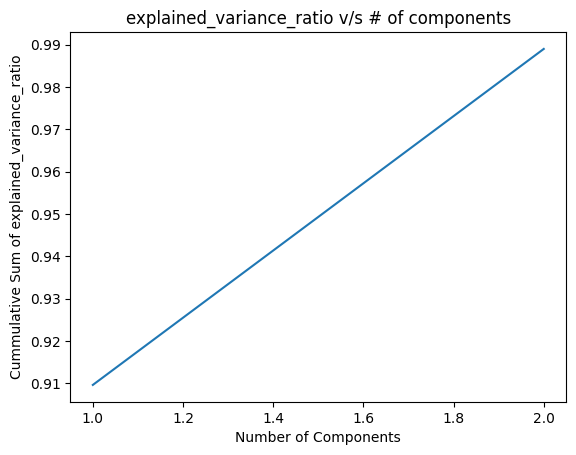

In [41]:
plt.plot(range(1,pca.n_components+1),pca.explained_variance_ratio_.cumsum())
plt.title("explained_variance_ratio v/s # of components")
plt.xlabel("Number of Components")
plt.ylabel("Cummulative Sum of explained_variance_ratio")
plt.show()

In [42]:
X_pca=pca.transform(df_feats)
X_pca.shape

(4898, 2)

** Combining the PCA with Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
X_train,X_test,ytrain,ytest=train_test_split(X,y,test_size=0.8)
ytrain=ytrain.values.ravel()
ytest=ytest.values.ravel()
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
list=[
    ('scaler',MinMaxScaler()),
    ('pca',PCA()),
    ('classifier',RandomForestClassifier())
]
pipeline=Pipeline(list)
pipeline.fit(X_train,ytrain)
print("Accuracy of the model on training data: ",model_rf.score(X_train,ytrain))
print("Accuracy of the model on test data: ",model_rf.score(X_test,ytest))

Accuracy of the model on training data:  0.44126659856996936
Accuracy of the model on test data:  0.443990813983159


In [70]:
#with normal model
X_train,X_test,ytrain,ytest=train_test_split(X,y,test_size=0.8)
list=[
    ('pca',PCA()),
    ('classifier',RandomForestClassifier())
]
pipeline=Pipeline(list)
pipeline.fit(X_train,ytrain)
print("Accuracy of the model on training data: ",model_rf.score(X_train,ytrain))
print("Accuracy of the model on test data: ",model_rf.score(X_test,ytest))

C:\Users\kaila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy of the model on training data:  0.6670071501532175
Accuracy of the model on test data:  0.6698137279918347
